In [1]:
import webdataset as wds

In [2]:
filepath = "/tmp/grit/00000.tar"

dataset = wds.WebDataset(filepath)

In [3]:
sample = next(iter(dataset))

In [4]:
sample.keys()

dict_keys(['__key__', '__url__', 'jpg', 'json', 'txt'])

In [5]:
import json

In [6]:
sample_json = json.loads(sample["json"])

In [7]:
sample_json.keys()

dict_keys(['id', 'noun_chunks', 'ref_exps', 'clip_similarity_vitb32', 'clip_similarity_vitl14', 'caption', 'url', 'key', 'status', 'error_message', 'width', 'height', 'original_width', 'original_height', 'exif', 'md5'])

In [8]:
sample_json['ref_exps']

[[0.0,
  72.0,
  0.14756515622138977,
  0.01605323702096939,
  0.8451001644134521,
  0.9699923992156982,
  0.80227804]]

In [9]:
sample['txt'][0:72], sample_json['caption'], sample_json['original_height'], sample_json['original_width']

(b'A very ingenious antique 1940s hall table with integrated umbrella stand',
 'A very ingenious antique 1940s hall table with integrated umbrella stand. Great design with a metal pail attached to...',
 640,
 640)

In [10]:
from PIL import Image

In [11]:
sample['jpg']

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x01\x01\x01\x02\x01\x01\x01\x02\x02\x02\x02\x02\x04\x03\x02\x02\x02\x02\x05\x04\x04\x03\x04\x06\x05\x06\x06\x06\x05\x06\x06\x06\x07\t\x08\x06\x07\t\x07\x06\x06\x08\x0b\x08\t\n\n\n\n\n\x06\x08\x0b\x0c\x0b\n\x0c\t\n\n\n\xff\xdb\x00C\x01\x02\x02\x02\x02\x02\x02\x05\x03\x03\x05\n\x07\x06\x07\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xff\xc0\x00\x11\x08\x01\x00\x01\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\

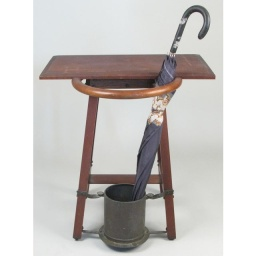

In [12]:
import io
image = Image.open(io.BytesIO(sample["jpg"]))
image

In [38]:
bbox_start = sample_json['ref_exps'][0][2:4]
bbox_end = sample_json['ref_exps'][0][4:6]

In [39]:
bbox_start, bbox_end

([0.14756515622138977, 0.01605323702096939],
 [0.8451001644134521, 0.9699923992156982])

In [40]:
bbox_start[0] = int((bbox_start[0] * sample_json['original_height']) * (sample_json['height'] / sample_json['original_height']))
bbox_end[0] = int((bbox_end[0] * sample_json['original_height']) * (sample_json['height'] / sample_json['original_height']))

In [41]:
bbox_start[1] = int((bbox_start[1] * sample_json['original_width']) * (sample_json['width'] / sample_json['original_width']))
bbox_end[1] = int((bbox_end[1] * sample_json['original_width']) * (sample_json['width'] / sample_json['original_width']))

In [42]:
bbox_start, bbox_end

([37, 4], [216, 248])

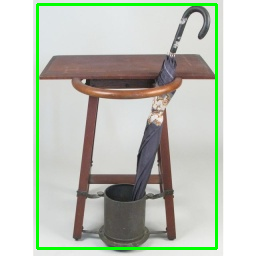

In [48]:
import cv2
import numpy as np

Image.fromarray((cv2.rectangle(np.array(image), tuple(bbox_start), tuple(bbox_end), (0,255,0), 2)))